In [90]:
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%matplotlib inline

In [165]:
def plot_beta(a, b, x, ax, like_at=0.5, color='darkred', label='prior'):

    #like_at = 1. - like_at
    
    beta = stats.beta(a+1, b+1)
    y = beta.pdf(x)
    
    # plot beta curve
    ax.plot(x, y, lw=2.5, c=color)
    
    # to likelihood line:
    markerline, stemlines, baseline = ax.stem([beta.ppf(0.5)], 
                                              [beta.pdf(beta.ppf(0.5))], 
                                              linefmt='-', markerfmt='o', 
                                              basefmt='w-', color=color)
    
    markerline.set_markerfacecolor(color)
    markerline.set_markersize(10)
    
    for s in stemlines:
        s.set_color(color)
        s.set_linewidth(3)
    
    # plot horizontal dashed line to probability density:
    ax.axhline(beta.pdf(beta.ppf(0.5)), xmax=beta.ppf(0.5),
               linewidth=2, color=color, ls='dashed')
    
    pl, ph = beta.interval(like_at)
    
    xprob = np.arange(pl, ph, 0.001)
    
    ax.fill_between(xprob, 0, beta.pdf(xprob),
                    color=color, alpha=0.2, 
                    label='CDF: '+ str(like_at))
        
    # poll beta:
    ax.set_title(label+' beta PDF', fontsize=24)
    ax.set_xlabel('rate', fontsize=20)
    ax.set_ylabel('probability density', fontsize=20)
    
    # tick sizes
    for xt, yt in zip(ax.xaxis.get_major_ticks(), ax.yaxis.get_major_ticks()):
        xt.label.set_fontsize(15)
        yt.label.set_fontsize(15)
    
    # plot legend
    ax.legend(loc='upper right', fontsize=20)


In [166]:
def plot_data(ax, a_prior, b_prior, a_obs, b_obs, colors=['steelblue','darkred']):
    
    bar_width = 0.1
    
    prior_inds = [0, 1]
    prior_counts = [b_prior, a_prior]

    prior_bars = ax.bar(prior_inds, prior_counts, color=colors[0],
                        label='prior observations', width=bar_width)
    
    obs_inds = [0+bar_width, 1+bar_width]
    obs_counts = [b_obs, a_obs]
    
    obs_bars = ax.bar(obs_inds, obs_counts, color=colors[1],
                      label='new observations', width=bar_width)
    
    max_count = max([a_prior, b_prior, a_obs, b_obs])
    
    # axes and labels
    ax.set_xlim(-(bar_width*5), 1 + (bar_width*7))
    ax.set_ylim(0, max_count + 5)
    
    ax.set_ylabel('observations', fontsize=20)
    ax.set_title('prior and new observations', fontsize=24)
    xtickmarks = ['failure','success']
    ax.set_xticks([0+bar_width, 1+bar_width])
    xticknames = ax.set_xticklabels(xtickmarks)
    
    for xt, yt in zip(ax.xaxis.get_major_ticks(), ax.yaxis.get_major_ticks()):
        xt.label.set_fontsize(20)
        yt.label.set_fontsize(20)

    ## add a legend
    ax.legend(loc='upper right', fontsize=15)
    

In [167]:
def plot_subplots(a_prior=1, b_prior=1, a_obs=1, b_obs=1, confidence=0.5):
    
    f, (ax_prior, ax_data, ax_posterior) = plt.subplots(3, figsize=(14,12),
                                                        sharex=False, sharey=False)
    
    density_x = np.linspace(0.00, 1.00, 1000)
    
    plot_beta(a_prior, b_prior, density_x, ax_prior, color='steelblue', 
              like_at=confidence, label='prior')
    
    plot_data(ax_data, a_prior, b_prior, a_obs, b_obs, colors=['steelblue','darkred'])
    
    plot_beta(a_prior+a_obs, b_prior+b_obs, density_x, ax_posterior, color='darkred', 
              like_at=confidence, label='posterior')
    
    f.subplots_adjust(hspace=0.5)
    
    plt.show()
    

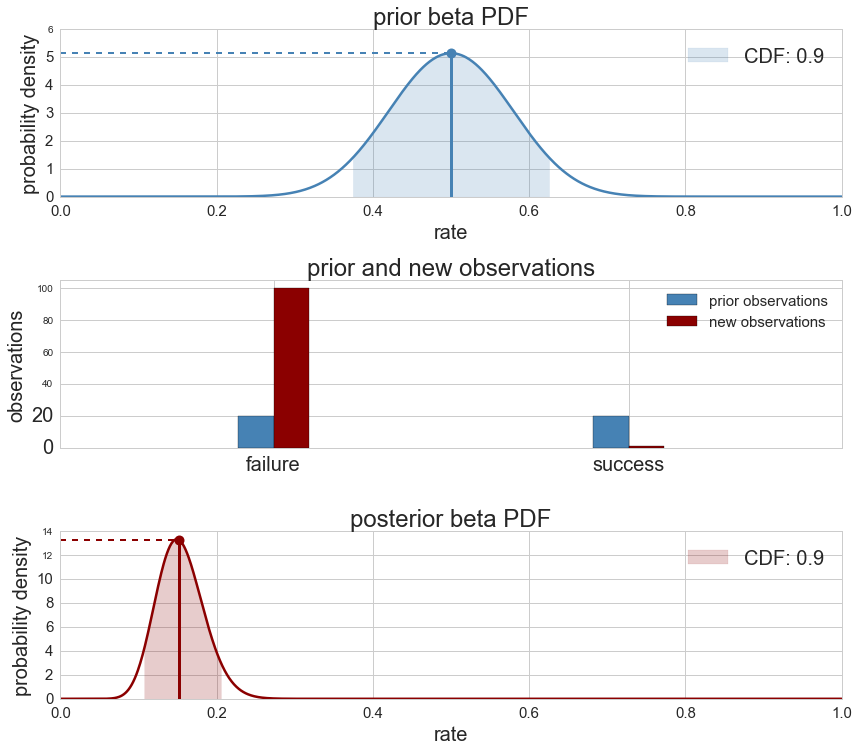

In [168]:
from ipywidgets import interact
import ipywidgets as widgets

interact(plot_subplots,
         a_prior=widgets.IntSlider(min=1,max=100,step=1,value=1,continuous_update=False),
         b_prior=widgets.IntSlider(min=1,max=100,step=1,value=1,continuous_update=False),
         a_obs=widgets.IntSlider(min=1,max=100,step=1,value=1,continuous_update=False),
         b_obs=widgets.IntSlider(min=1,max=100,step=1,value=1,continuous_update=False),
         confidence=widgets.FloatSlider(min=0.01, max=0.99, step=0.01, value=0.5, continuous_update=False))